In [1]:
# First Order ODEs (Runge-Kutta method)

# dy/dt = f(t, y)

# y_{n+1} = y_n + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
# t_{n+1} = t_n + h

# k1 = h * f(t_n, y_n)
# k2 = h * f(t_n + h/2, y_n + k1/2)
# k3 = h * f(t_n + h/2, y_n + k2/2)
# k4 = h * f(t_n + h, y_n + k3)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [26]:
def deposit(D0, t):
    if t == 0:
        return D0

    D = D0 / t
    if D > 0:
        return D
    return 0

def saving_account_ode(t, A, W, D, r):
    dA_dt = r * A + deposit(D, t) - W
    return dA_dt

In [27]:
def runge_kutta_4th_order(f, t0, A0, r, D, W, h, n_iters):
    t_values = [t0]
    A_values = [A0]
    
    for _ in range(n_iters):
        t = t_values[-1]
        A = A_values[-1]

        k1 = h * f(t, A, W, D, r)
        k2 = h * f(t + h/2, A + k1/2, W, D, r)
        k3 = h * f(t + h/2, A + k2/2, W, D, r)
        k4 = h * f(t + h, A + k3, W, D, r)

        A_new = A + (k1 + 2*k2 + 2*k3 + k4) / 6
        t_new = t + h

        A_values.append(A_new)
        t_values.append(t_new)


    return t_values, A_values

In [30]:
t0 = 0
A0 = 100
W = 50
D = 100
r = 0.05
h = 0.01
n_iters = 5000

t_values, A_values = runge_kutta_4th_order(saving_account_ode, t0, A0, r, D, W, h, n_iters)

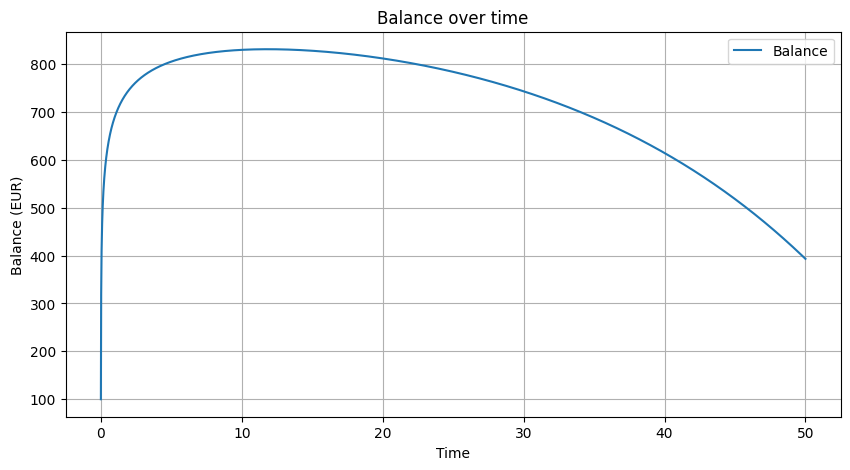

In [31]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t_values, A_values, label="Balance")
plt.xlabel("Time")
plt.ylabel("Balance (EUR)")
plt.legend()
plt.title("Balance over time")
plt.grid(True)
plt.show()

In [32]:
# dA/dt = rA + D - w*A/100 
# dw/dt = k/t + A/B

In [37]:
def savings_account_ode_coupled(t, A, w, r, D, k, B, t_change=0):
    dA_dt = r * A + D - w * A / 100

    if t > t_change:
        dw_dt = k / t + A / B
    else:
        dw_dt = 0   

    return dA_dt, dw_dt

In [47]:
def runge_kutta_4th_order_coupled(f, t0, A0, w0, r, D, k, B, h, t_change, n_iters):
    t_values = [t0]
    A_values = [A0]
    w_values = [w0]

    for _ in range(n_iters):

        t = t_values[-1]
        A = A_values[-1]
        w = w_values[-1]

        k1_A, k1_w = f(t, A, w, r, D, k, B, t_change)
        k1_A = h * k1_A 
        k1_w = h * k1_w

        k2_A, k2_w = f(t + h/2, A+k1_A/2, w+k1_w/2, r, D, k, B, t_change)
        k2_A = h * k2_A 
        k2_w = h * k2_w

        k3_A, k3_w = f(t + h/2, A+k2_A/2, w+k2_w/2, r, D, k, B, t_change)
        k3_A = h * k3_A 
        k3_w = h * k3_w

        k4_A, k4_w = f(t + h, A + k3_A, w + k3_w, r, D, k, B, t_change)
        k4_A = h * k4_A 
        k4_w = h * k4_w

        A_new = A + (k1_A + 2 * k2_A + 2 * k3_A + k4_A) / 6
        w_new = w + (k1_w + 2 * k2_w + 2 * k3_w + k4_w) / 6
        t_new = t + h 

        t_values.append(t_new)
        A_values.append(A_new)
        w_values.append(w_new)

    return t_values, A_values, w_values



In [57]:
t0 = 0.0001 
A0 = 100
w0 = 10
r = 0.05 
D = 500 
k = 0.1 
B = 200
h = 0.01 
t_change = 200 
n_iters = 500000
t_values, A_values, w_values = runge_kutta_4th_order_coupled(savings_account_ode_coupled, \
    t0, A0, w0, r, D, k, B, h, t_change, n_iters)

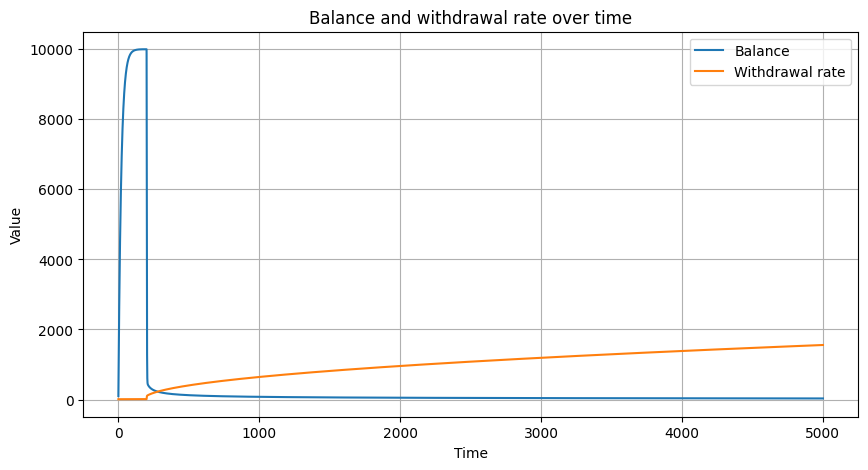

In [58]:
_ = plt.figure(figsize=(10, 5))
plt.plot(t_values, A_values, label="Balance")
plt.plot(t_values, w_values, label="Withdrawal rate")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Balance and withdrawal rate over time")
plt.grid(True)
plt.show()